<a href="https://colab.research.google.com/github/callaghan210-coder/FinaceAI/blob/main/DeptRepaymentPrediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Debt Repayment Prediction Model

This notebook outlines the steps taken to build a Random Forest Classifier model to predict whether a user's total debts are above a certain threshold based on their financial profile. The process includes data loading, preprocessing, model training, evaluation, and interpretation.


# 1. Import Necessary Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Use Classifier for binary target
from sklearn.metrics import mean_squared_error, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Load the Datasets

In [43]:
# Load your datasets
trans_df = pd.read_csv("transactions.csv")
profiles_df = pd.read_csv("user_profiles.csv")
goals_df = pd.read_csv("user_goals.csv")


# 3. Data Merging

In [44]:
# Merge the profiles_df with goals_df on 'User ID'
merged_df = pd.merge(profiles_df, goals_df, on='User ID', how='inner')


# 4. Data Selection and Preparation

In [45]:
# Select relevant columns
final_df = merged_df[['User ID', 'Occupation', 'Age', 'Saving Amount', 'Total Debts', 'Debt Type', 'Goal', 'Goal Amount', 'Period (Months)', 'Importance']]

# Overwrite 'User ID' with numerical indices starting from 1
final_df['User ID'] = range(1, len(final_df) + 1)
final_df.reset_index(drop=True, inplace=True)

# Display the first few rows
print(final_df.head())

# Save the DataFrame as a CSV file
final_df.to_csv('final_df.csv', index=False)


   User ID  Occupation  Age  Saving Amount  Total Debts     Debt Type  \
0        1     Teacher   60        4498.78     17838.30   Credit Card   
1        2  Freelancer   65        2353.73      8954.34  Student Loan   
2        3  Freelancer   38         813.40      5687.75  Student Loan   
3        4     Teacher   40        3717.56     16495.68      Mortgage   
4        5  Freelancer   60        2372.86      9260.36  Student Loan   

             Goal  Goal Amount  Period (Months) Importance  
0        Vacation      9698.39               20     Luxury  
1     Buy a house      9052.39               51      Basic  
2     Buy a house     10515.70               15     Luxury  
3  Emergency Fund      3363.30                9      Basic  
4    Car purchase     14065.39               32     Luxury  


# 5. Feature and Target Selection

In [46]:
# Select features (X) and target (y)
X = final_df[['Age', 'Saving Amount', 'Total Debts', 'Goal Amount', 'Period (Months)']]  # Consider adding categorical encoding

# Create a binary target variable indicating if Total Debts is above a threshold
threshold = final_df['Total Debts'].median()  # Example threshold, can be adjusted
y = (final_df['Total Debts'] > threshold).astype(int)  # 1 if above threshold, else 0


# 6. Data Preprocessing

In [47]:
# Check for missing values and fill them
X.fillna(X.mean(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-47-96794c03b8d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


# 7. Data Splitting

In [48]:
# Step 2: Splitting the Data
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Print the shapes to confirm the splits
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Holdout set shape: {X_holdout.shape}')


Training set shape: (56000, 5)
Validation set shape: (24000, 5)
Holdout set shape: (20000, 5)


# 8. Model Training

In [49]:
# Step 3: Model Training
rf_model = RandomForestClassifier(random_state=42)  # Use Classifier
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 9. Model Evaluation on Validation Set

In [50]:
# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model performance
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11997
           1       1.00      1.00      1.00     12003

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



# 10. Final Model Testing

In [51]:
# Step 5: Final Model Testing
y_holdout_pred = rf_model.predict(X_holdout)
print(classification_report(y_holdout, y_holdout_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10072
           1       1.00      1.00      1.00      9928

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



# 11. Model Interpretation

Age: 0.0002
Saving Amount: 0.0005
Total Debts: 0.9985
Goal Amount: 0.0005
Period (Months): 0.0002


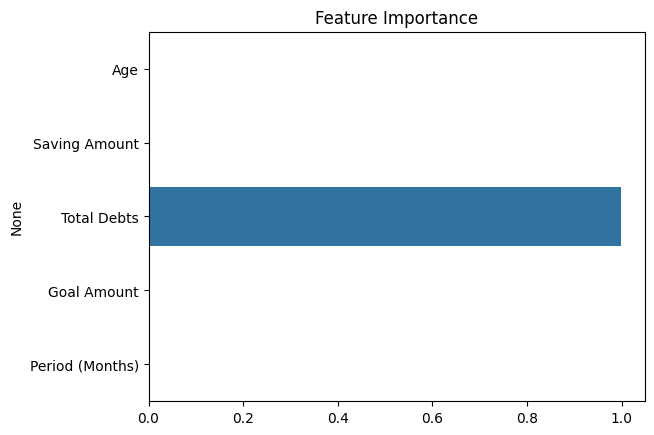

In [52]:
# Step 6: Model Interpretation
importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importance
for name, importance in zip(feature_names, importances):
    print(f'{name}: {importance:.4f}')

# Visualize feature importance
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


# 12. Saving the Model

In [53]:
# Step 7: Saving the Model
joblib.dump(rf_model, 'debt_repayment_model.pkl')


['debt_repayment_model.pkl']

# 13. Model Evaluation: Confusion Matrix and ROC Curve

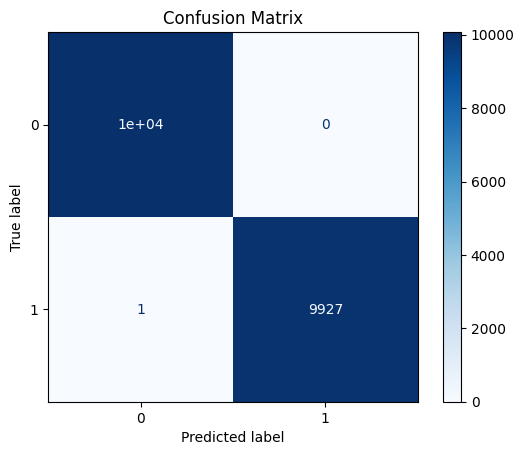

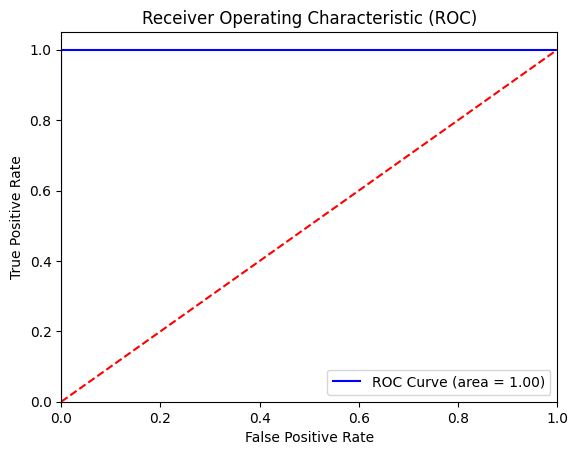

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Predict on the holdout set
y_holdout_pred = rf_model.predict(X_holdout)

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_holdout_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_holdout, rf_model.predict_proba(X_holdout)[:, 1])
fpr, tpr, thresholds = roc_curve(y_holdout, rf_model.predict_proba(X_holdout)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Conclusion
In this notebook, we built a Random Forest Classifier to predict user debt repayment capabilities based on their financial profiles. We evaluated the model using various metrics and visualizations to interpret its performance.